# Review

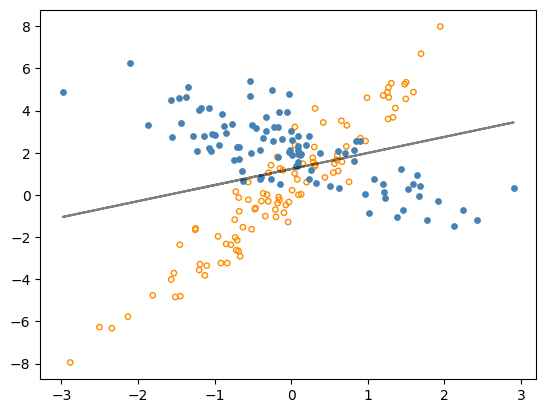

In [5]:

import matplotlib.pyplot as plt
import numpy as np
import numpyro
import numpyro.distributions as dist

from jax import random
from numpyro.infer import MCMC, NUTS

b = np.array([[0.5, 3.],
              [2., -1.]])

x0 = np.random.normal(size=100)
eps = np.random.normal(size=100)
y0 = b[0,0] + b[0,1] * x0 + eps
f0 = np.repeat(0, 100)

x1 = np.random.normal(size=100)
eps = np.random.normal(size=100)
y1 = b[1,0] + b[1,1] * x1 + eps
f1 = np.repeat(1, 100)

x = np.hstack([x0, x1])
f = np.hstack([f0, f1])
y = np.hstack([y0, y1])

m, b = np.polyfit(x, y, 1)
y_pred = b + m * x
plt.plot(x, y_pred, c='black', alpha=0.5)

plt.scatter(x0, y0, s=15, facecolors='none', edgecolors='darkorange')
plt.scatter(x1, y1, s=15, facecolors='steelblue')

plt.show()

In [6]:
def regression(x, f, y=None):
    s0 = numpyro.sample('s0', dist.Exponential(1).expand((2,)))
    s1 = numpyro.sample('s1', dist.Exponential(1).expand((2,)))

    b0 = numpyro.sample('b0', dist.Normal(0, s0).expand((2, )))
    b1 = numpyro.sample('b1', dist.Normal(0, s1).expand((2, )))
    mu = numpyro.deterministic('mu', b0[f] + b1[f] * x)
    sigma = numpyro.sample('sigma', dist.Exponential(1))

    return numpyro.sample('obs', dist.Normal(mu, sigma), obs=y)

In [7]:
mcmc = MCMC(NUTS(model=regression), num_warmup=1000, num_samples=1000)
mcmc.run(random.PRNGKey(0), x=x, f=f, y=y)
mcmc.print_summary()

#            mean       std    median      5.0%     95.0%     n_eff     r_hat
# b0[0]      0.52      0.10      0.52      0.34      0.68   1272.36      1.01
# b0[1]      1.89      0.10      1.89      1.71      2.05   1695.78      1.00
# b1[0]      3.03      0.12      3.03      2.85      3.24   1693.49      1.00
# b1[1]     -1.09      0.11     -1.09     -1.27     -0.90   1469.02      1.00
# s0[0]      0.97      0.72      0.75      0.16      1.88    976.28      1.00
# s0[1]      1.84      0.89      1.65      0.72      3.08    890.76      1.00
# s1[0]      2.48      1.07      2.26      1.06      4.05   1169.87      1.00
# s1[1]      1.38      0.79      1.16      0.40      2.42   1072.68      1.00
# sigma      1.01      0.05      1.01      0.93      1.09   1566.30      1.00

sample: 100%|██████████| 2000/2000 [00:02<00:00, 935.26it/s, 7 steps of size 6.16e-01. acc. prob=0.89] 



                mean       std    median      5.0%     95.0%     n_eff     r_hat
     b0[0]      0.59      0.10      0.59      0.41      0.74   1644.94      1.00
     b0[1]      2.06      0.10      2.06      1.90      2.23   1730.21      1.00
     b1[0]      2.98      0.10      2.97      2.81      3.15   1722.69      1.00
     b1[1]     -1.15      0.10     -1.15     -1.31     -1.00   1826.60      1.00
     s0[0]      0.99      0.70      0.79      0.19      1.89   1042.59      1.00
     s0[1]      1.95      0.94      1.76      0.76      3.31    850.43      1.00
     s1[0]      2.43      1.02      2.22      0.92      3.80   1203.72      1.00
     s1[1]      1.42      0.80      1.20      0.49      2.59   1181.56      1.00
     sigma      1.02      0.05      1.02      0.95      1.11   1264.50      1.00

Number of divergences: 0


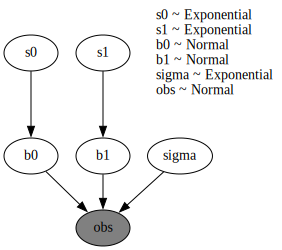

In [8]:
numpyro.render_model(regression, model_args=(x, f, y,), render_distributions=True)